<a href="https://colab.research.google.com/github/TetianaHrunyk/AccomodationPricesAnalysis/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pathlib import Path
import os
import re
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
plt.rcParams["figure.figsize"] = (16, 6)
sns.set_style("whitegrid")

# Constants

In [ ]:
BASE_PATH = "drive/MyDrive/Projects/RentalsPL/data/"

# Loading data

In [ ]:
os.listdir(BASE_PATH)

['krakow_2023-08-24T07:32.csv',
 'krakow_2023-08-24T07:32.gsheet',
 'krakow_2023-08-24T07:55.csv',
 'wroclaw_2023-08-24T09:16.csv',
 'poznan_2023-08-24T09:44.csv',
 'lodz_2023-08-24T10:07.csv',
 'warszawa_2023-08-24T10:16.csv']

In [ ]:
krakow = pd.read_csv(os.path.join(BASE_PATH, 'lodz_2023-08-24T10:07.csv'))

In [ ]:
krakow.head()

,added,title,price,tags,description,images,city,scraped
0,22 sierpnia 2023,Dwupokojowy apartament z balkonem obok MANUFAK...,2 500 zł,"['Prywatne', 'Poziom: 5', 'Umeblowane: Tak', '...","Słoneczny, dwupokojowy apartament z balkonem i...",['https://ireland.apollo.olxcdn.com:443/v1/fil...,lodz,2023-08-24T10:07
1,17 sierpnia 2023,M-2 Łódź ul. Pabianicka,1 200 zł,"['Prywatne', 'Poziom: 4', 'Umeblowane: Tak', '...",Mam do wynajęcia mieszkanie typu M-2 w pełni ...,['https://ireland.apollo.olxcdn.com:443/v1/fil...,lodz,2023-08-24T10:07
2,17 sierpnia 2023,"Mieszkanie 2 pokojowe, Łódź Bałuty, ul. Plantowa",1 500 zł,"['Prywatne', 'Poziom: 4', 'Umeblowane: Tak', '...","Witam,\n\nMam do wynajęcia umeblowane i wyposa...",['https://ireland.apollo.olxcdn.com:443/v1/fil...,lodz,2023-08-24T10:07
3,22 sierpnia 2023,Wynajmę bezpośrednio kawalerkę w centrum Łodzi,2 100 zł,"['Prywatne', 'Poziom: 2', 'Umeblowane: Tak', '...",Wynajmę bezpośrednio mieszkanie w nowo wybudow...,['https://ireland.apollo.olxcdn.com:443/v1/fil...,lodz,2023-08-24T10:07
4,17 sierpnia 2023,Do wynajęcia od 1 września dwupokojowe mieszka...,2 200 zł,"['Firmowe', 'Poziom: 1', 'Umeblowane: Tak', 'R...",Do wynajęcia od 1 września dwupokojowe mieszka...,['https://ireland.apollo.olxcdn.com:443/v1/fil...,lodz,2023-08-24T10:07


In [ ]:
krakow["tags"] = krakow["tags"].apply(lambda x: eval(x))

In [ ]:
krakow["price"] = krakow["price"].apply(lambda x: int(re.findall(r"\d+", x.replace(" ", ""))[0]))

In [ ]:
def extract_czynsz(tags):
  czynsz_tag = [tag for tag in tags if "czynsz" in tag.lower()]
  if czynsz_tag:
    digits = re.findall(r"\d+", czynsz_tag[0].replace(" ", ""))
    if digits:
      return sum([int(d) for d in digits])
    return 0

krakow["extra_price"] = krakow["tags"].apply(lambda tags: extract_czynsz(tags))

In [ ]:
krakow["total_price"] = krakow["price"] + krakow["extra_price"]

# Insights

In [ ]:
krakow.price.describe()

count      364.000000
mean      1912.370879
std       1408.875238
min        500.000000
25%       1450.000000
50%       1750.000000
75%       2100.000000
max      25000.000000
Name: price, dtype: float64

In [ ]:
krakow.extra_price.describe()

count     363.000000
mean      538.556474
std       336.233482
min         1.000000
25%       390.000000
50%       500.000000
75%       650.000000
max      3800.000000
Name: extra_price, dtype: float64

In [ ]:
krakow.total_price.describe()

count      363.000000
mean      2450.548209
std       1517.440128
min        651.000000
25%       1875.000000
50%       2280.000000
75%       2700.000000
max      25700.000000
Name: total_price, dtype: float64

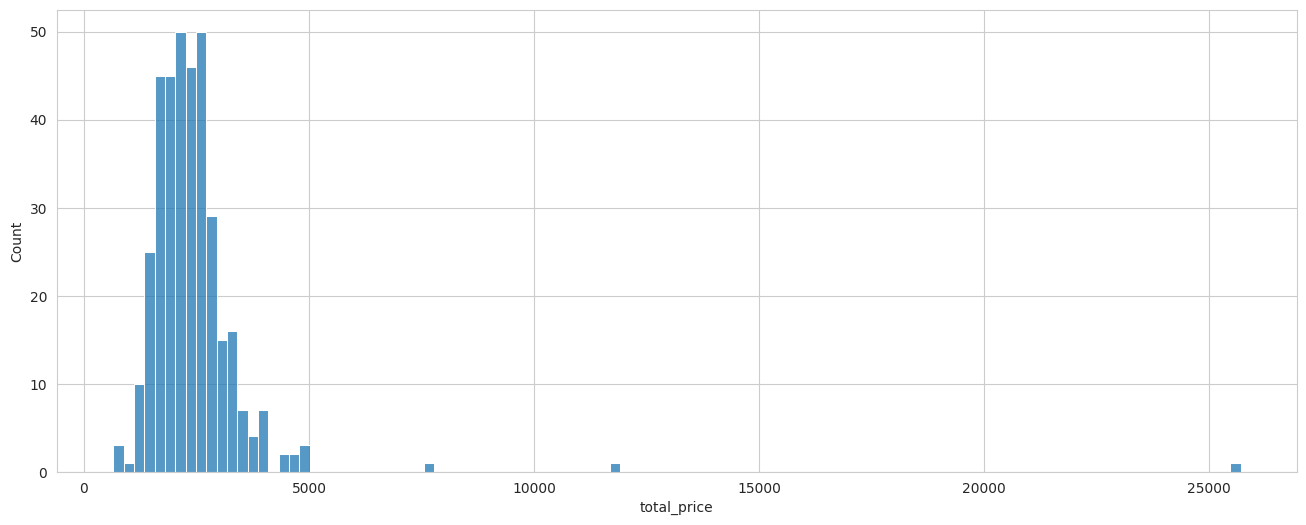

In [ ]:
sns.histplot(data=krakow, x="total_price");

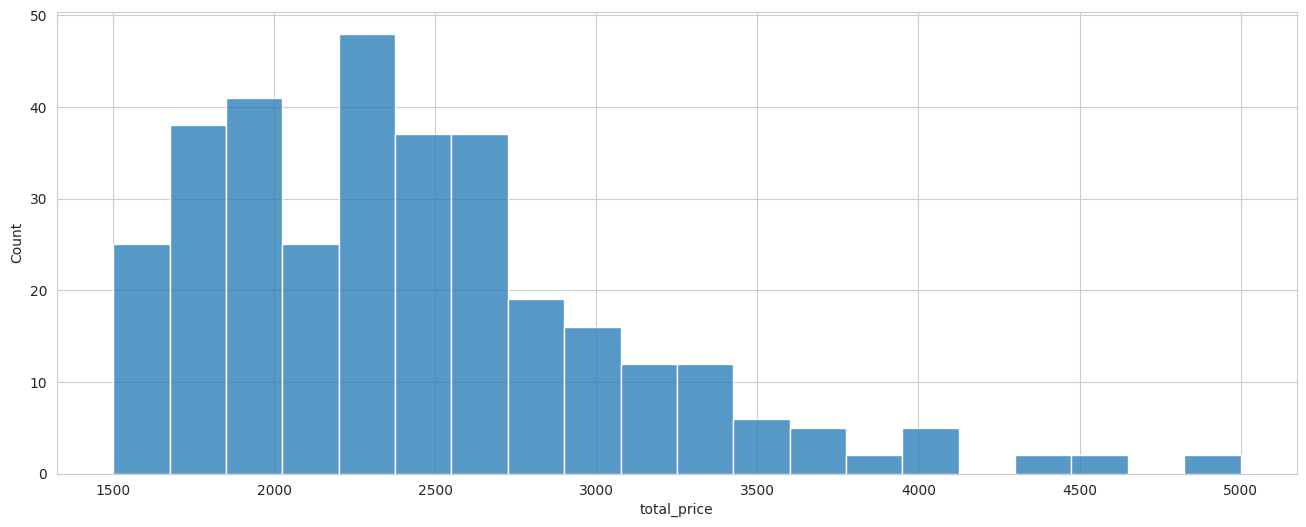

In [ ]:
sns.histplot(data=krakow[(krakow.total_price.between(1500, 5000))], x="total_price", bins=20);